# Exercise 11-1: Create a multiple regression

## Import the data

In [31]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
fish = pd.read_csv('Fish.csv')

In [33]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [34]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish.rename(columns={
    'Length1': 'VerticalLength',
    'Length2': 'DiagonalLength',
    'Length3': 'CrossLength'
}, inplace=True)

fish.head()

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [35]:
# get the correlation data for the Weight column
import numpy as np

numeric_fish = fish.select_dtypes(include=[np.number])
correlation_data = numeric_fish.corr()['Weight']

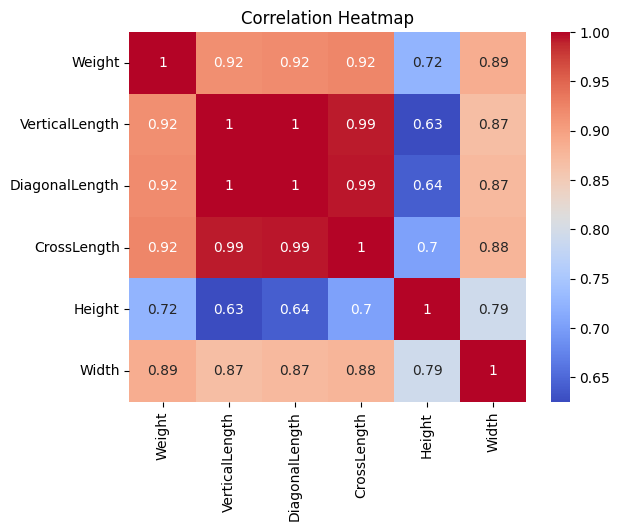

In [36]:
# create a heatmap for the correlation data
import matplotlib.pyplot as plt

sns.heatmap(numeric_fish.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Create a multiple regression model

In [37]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish[fish['Species'] == 'Bream']

In [38]:
# split the training and test data 
X = bream[['VerticalLength', 'DiagonalLength', 'CrossLength', 'Height', 'Width']]
y = bream['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# create the model and fit the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# score the testing data
score = model.score(X_test, y_test)
print("Model score on test data:", score)

Model score on test data: 0.8014040082620604


In [41]:
# make the predictions
predictions = model.predict(X_test)

In [42]:
# join the predicted data with the original data
results = X_test.copy()
results['Actual Weight'] = y_test
results['Predicted Weight'] = predictions

## Plot the residuals

In [43]:
# calculate the residuals and store them in a column
results['Residuals'] = results['Actual Weight'] - results['Predicted Weight']

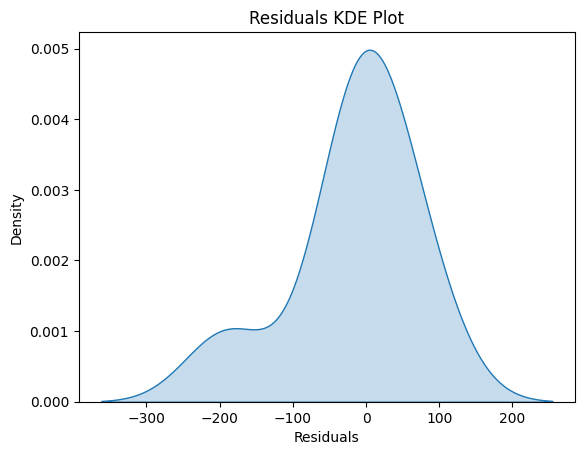

In [44]:
# create a KDE plot for the residuals
sns.kdeplot(results['Residuals'], fill=True)
plt.title('Residuals KDE Plot')
plt.show()